## Project: Creating a notebook for Unicorn analysis
*Original dataset sometimes includes typo, please double check!*

In [1]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import re

In [2]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import datetime

/Users/hiromi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### 0. Getting data from CB insights statistics web page. Cheating from [my autoscraper](https://github.com/Hiromisa/unicorn-autoscrape/blob/main/unicornlist.py). 

In [3]:
url = 'https://www.cbinsights.com/research-unicorn-companies'
df = pd.io.html.read_html(url)
df = df[0]
df['Valuation ($B)'] = df['Valuation ($B)'].str.replace('$', '', regex=True).astype(float)

#### If you find error message like '*ParserError: Unknown string format: 7/27/202/td>' , it may be typo of original dataset. How to solve it.
1, Check where error happening  str.contains('str of potential typo')   
2, Replace it with .replace('typo', 'right strings' )

an examples below:

In [4]:
df[df['Date Joined'].str.contains('7/27/202')]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
94,Ro,5.00,7/27/2020,United States,New York,Health,"Initialized Capital, General Catalyst, SignalFire"
133,iCapital Network,4.00,7/27/202/td>,United States,New York,Fintech,"BlackRock, Blackstone, UBS"
171,PsiQuantum,3.15,7/27/2021,United States,Palo Alto,Hardware,"Playground Global, M12, BlackRock"
323,Fireblocks,2.00,7/27/2021,United States,New York,Fintech,"Tenaya Capital, Coatue Management, Stripes Group"
463,At-Bay,1.35,7/27/2021,United States,Mountain View,Fintech,"Lightspeed Venture Partners, Khosla Ventures, ..."


In [7]:
df['Date Joined'] = df['Date Joined'].replace('7/27/202/td>', '7/27/2021')

In [10]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
now = pd.to_datetime('today')
df['unicorn_age'] = (now.year - df['Date Joined'].dt.year) - ((now.month - df['Date Joined'].dt.month) < 0)

### 1. How many Unicorns (& Decacorns) in the world?

Unicorns

In [11]:
len(df)

779

Decacorns

In [12]:
len(df[df['Valuation ($B)'] >=10])

34

#### 1-1. top10 Unicorns by valuation($B)

In [13]:
df.head(10)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,unicorn_age
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4
1,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",7
2,SpaceX,74.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",8
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",9
4,Instacart,39.0,2014-12-30,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",6
5,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",3
6,Nubank,30.0,2018-03-01,Brazil,Sao Paulo,Fintech,"Sequoia Capital, Redpoint e.ventures, Kaszek V...",3
7,Epic Games,28.7,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",2
8,Databricks,28.0,2019-02-05,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",2
9,Rivian,27.6,2019-09-10,United States,Plymouth,Auto & transportation,"Amazon, Ford Motor Company, Cox Automotive",1


#### 1-2. who is an old unicorn?

In [14]:
df.sort_values(by = 'unicorn_age', ascending=False).head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,unicorn_age
457,Veepee,1.38,2007-07-20,France,La Plaine Saint-Denis,E-commerce & direct-to-consumer,"Summit Partners, Qatar Holding",14
174,VANCL,3.00,2010-12-14,China,Beijing,E-commerce & direct-to-consumer,"Ceyuan Ventures, QiMing Venture Partners, Tema...",10
76,Vice Media,5.70,2011-04-02,United States,Brooklyn,Internet software & services,"Technology Crossover Ventures, A&E Television ...",10
3,Klarna,45.60,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",9
278,Trendy Group International,2.00,2012-02-13,Hong Kong,Kowloon,Consumer & retail,L Capital Partners,9


#### 1-3. who is new?

#### 1-3-1. joined unicorn club within a year

In [15]:
df_new = df[df['unicorn_age'] < 1].sort_values(by = 'Date Joined', ascending=False)

In [16]:
df_new.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,unicorn_age
249,Odoo,2.30,2021-07-29,Belgium,Louvain-la-Neuve,Internet software & services,"Summit Partners, Noshaq, Sofinnova Partners",0
425,Culture Amp,1.50,2021-07-29,Australia,Richmond,Internet software & services,"Felicis Ventures, Index Ventures, Blackbird Ve...",0
146,Redwood Materials,3.70,2021-07-28,United States,Carson City,Other,"Breakthrough Energy Ventures, Capricorn Invest...",0
200,Contentful,3.00,2021-07-28,Germany,Berlin,Internet software & services,"Balderton Capital, General Catalyst, Tiger Glo...",0
253,Algolia,2.25,2021-07-28,United States,San Francisco,Internet software & services,"Accel, Alven Capital, Storm Ventures",0


In [17]:
len(df_new)

355

#### 1-3-2. filter on 'Date Joined' You can change '2021-07-20' to your favorite date.

In [18]:
df[df['Date Joined'] >= '2021-06-20']

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,unicorn_age
10,FTX,18.00,2021-07-20,Hong Kong,NaN,Fintech,"Sequoia Capital, Thoma Bravo, Softbank",0
133,iCapital Network,4.00,2021-07-27,United States,New York,Fintech,"BlackRock, Blackstone, UBS",0
138,Sorare,3.80,2021-07-17,France,Paris,E-commerce & direct-to-consumer,"Y Combinator, Atomico, Accel",0
141,Articulate,3.75,2021-07-01,United States,New York,Edtech,"Redpoint Ventures, Harrison Metal, Bessemer Ve...",0
146,Redwood Materials,3.70,2021-07-28,United States,Carson City,Other,"Breakthrough Energy Ventures, Capricorn Invest...",0
...,...,...,...,...,...,...,...,...
774,GO1,1.00,2021-07-19,Australia,Brisbane,Internet software & services,"Y Combinator, M12, SEEK",0
775,Carsome,1.00,2021-07-12,Malaysia,Selangor,E-commerce & direct-to-consumer,"Gobi Partners, 500 Startups, Ondine Capital",0
776,Interos,1.00,2021-07-22,United States,Arlington,Fintech,"Kleiner Perkins Caufield & Byers, NightDragon ...",0
777,BlackBuck,1.00,2021-07-22,India,Bengaluru,"Supply chain, logistics, & delivery","Accel, Sands Capital, International Finance Co...",0


#### 1-4. SUM of unicorns valuation

In [19]:
df['Valuation ($B)'].sum()

2484.58

### 2. count by country

In [20]:
countries = df.Country.value_counts()
df_countries = pd.DataFrame(countries)

In [21]:
df_countries

,Country
United States,392
China,156
India,34
United Kingdom,31
Germany,18
Israel,18
France,17
Canada,13
South Korea,11
Brazil,11


#### 2-1. How many countries have Unicorn?

In [22]:
len(df_countries)

40

#### 2-2. Countries that have more than 10 Unicorns

In [23]:
df_countries[df_countries.Country > 10]

,Country
United States,392
China,156
India,34
United Kingdom,31
Germany,18
Israel,18
France,17
Canada,13
South Korea,11
Brazil,11


<AxesSubplot:>

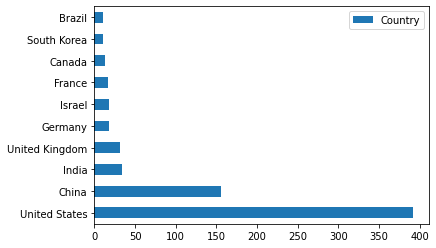

In [24]:
df_countries[df_countries.Country > 10].plot(kind='barh')

In [25]:
# df_countries.to_csv('unicorn_by_country.csv')

#### 2-3.  The number of Japan-based Unicorn

In [26]:
# df_cities.index
df_countries.loc[['Japan'],['Country']]

,Country
Japan,6


#### 2-4. The list of Japan-based Unicorns

In [27]:
df[df.Country == 'Japan']

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,unicorn_age
287,Preferred Networks,2.0,2018-05-17,Japan,Tokyo,Artificial intelligence,"Toyota Motor Corporation, Mizuho Financial Gro...",3
384,SmartHR,1.6,2021-06-08,Japan,Tokyo,Fintech,"BEENEXT, World Innovation Lab, Light Street Ca...",0
504,SmartNews,1.2,2019-08-05,Japan,Tokyo,Mobile & telecommunications,"Japan Post Capital, Globis Capital Partners, A...",1
519,Paidy,1.2,2021-03-30,Japan,Tokyo,Fintech,"ITOCHU Corporation, Arbor Ventures, Soros Fund...",0
648,Liquid,1.0,2019-04-03,Japan,Tokyo,Fintech,"JAFCO Co, Bitmain Technologies, IDG Capital",2
683,Playco,1.0,2020-09-21,Japan,Tokyo,Other,"Sozo Ventures, Caffeinated Capital, Sequoia Ca...",0


### 3. by city

In [28]:
cities = df.City.value_counts()
df_cities = pd.DataFrame(cities)

In [29]:
df_cities.head()

,City
San Francisco,113
Beijing,61
New York,57
Shanghai,39
London,22


#### 3-1. How many cities have Unicorn?

In [30]:
len(df_cities)

209

#### 3-2. Cities that have more than 10 Unicorns.

In [31]:
# df_cities.City.nlargest(25)
df_cities[df_cities.City > 10]

,City
San Francisco,113
Beijing,61
New York,57
Shanghai,39
London,22
Shenzhen,17
Bengaluru,15
Chicago,15
Paris,14
Boston,13


In [32]:
len(df_cities[df_cities.City > 10])

14

###  4. How many Unicorns have SB invested (as a part of lead investor) , according to this dataset* Be careful.

In [33]:
len(df[df['Select Investors'].str.contains('SoftBank') == True])

26

#### 4-1. Unicorn List that Softbank invested

In [34]:
df[df['Select Investors'].str.contains('SoftBank') == True]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,unicorn_age
21,Fanatics,12.80,2012-06-06,United States,Jacksonville,E-commerce & direct-to-consumer,"SoftBank Group, Andreessen Horowitz, Temasek H...",9
38,Roivant Sciences,9.09,2017-08-09,United States,New York,Health,"SoftBankGroup, Founders Fund",3
42,OYO Rooms,9.00,2018-09-25,India,Gurugram,Travel,"SoftBank Group, Sequoia Capital India,Lightspe...",2
60,National Stock Exchange of India,6.50,2020-07-01,India,Mumbai,Fintech,"TA Associates, SoftBank Group, GS Growth",1
62,Ola Cabs,6.30,2014-10-27,India,Bengaluru,Auto & transportation,"Accel Partners, SoftBank Group, Sequoia Capital",6
90,Nuro,5.00,2019-02-11,United States,Mountain View,Auto & transportation,"SoftBank Group, Greylock Partners, Gaorong Cap...",2
120,Greensill,4.00,2018-07-16,United Kingdom,London,Fintech,"SoftBank Group, General Atlantic",3
123,QuintoAndar,4.00,2019-09-09,Brazil,Campinas,E-commerce & direct-to-consumer,"Kaszek Ventures, General Atlantic, SoftBank Group",1
126,Kavak,4.00,2020-10-01,Mexico,Lerma de Villada,E-commerce & direct-to-consumer,"DST Global, SoftBank Group, Mountain Nazca",0
142,Cohesity,3.70,2018-06-11,United States,San Jose,Data management & analytics,"SoftBank Group, Sequoia Capital, Wing Venture ...",3


### 5. by indstry

##### ※ If there's no typo or lower/upper case prorblem. You can use  industries = df['Industry'].value_counts( ). At this case, we can say 'education' is used for almost same meaning as 'edtech' because Duolingo is known as an Edtech company.

In [35]:
df['Industry_f'] = df['Industry'].str.replace('<', '').str.lower().replace('education','edtech')

In [36]:
industries = df['Industry_f'].value_counts()
df_industries = pd.DataFrame(industries)

In [37]:
df_industries.head()

,Industry_f
fintech,144
internet software & services,126
e-commerce & direct-to-consumer,84
artificial intelligence,64
health,56


<AxesSubplot:>

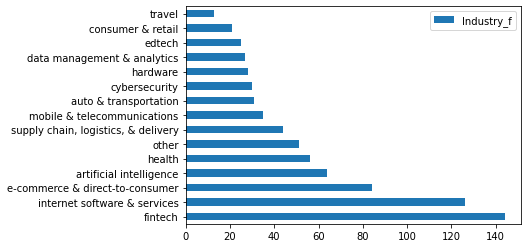

In [38]:
df_industries.plot(kind = 'barh')

### 6. When you pick .csv files downloaded before, put the csv file in the same folder as the notebook.

In [39]:
df2 = pd.read_csv('UnicornList-july2020.csv')
df2['Valuation ($B)'] = df2['Valuation ($B)'].str.replace('$', '', regex=True).astype(float)

In [40]:
df2.head()

,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors
0,FiveTran,1.2,6/30/2020,United States,Data management & analytics,"Matrix Partners, Andreessen Horowitz, General ..."
1,KKW Beauty,1.0,6/29/2020,United States,E-commerce & direct-to-consumer,Coty
2,Cazoo,1.0,6/23/2020,United Kingdom,E-commerce & direct-to-consumer,"dmg ventures, General Catalyst, Octopus Ventures"
3,Workhuman,1.2,6/23/2020,Ireland,Internet software & services,ICG
4,Upgrade,1.0,6/17/2020,United States,Fintech,"Union Square Ventures, Ribbit Capital, VY Capital"


*1. number of unicorn*

In [41]:
len(df2)

475

*2. country*

In [42]:
countries2 = df2.Country.value_counts()
df2_countries = pd.DataFrame(countries2)

In [43]:
df2_countries.head()

,Country
United States,225
China,122
United Kingdom,25
India,21
Germany,13


*3. industry*

In [44]:
df2['Industry_f'] = df2['Industry'].str.replace('<', '').str.lower().replace('education','edtech')

In [45]:
industries2 = df2['Industry_f'].value_counts()
df2_industries = pd.DataFrame(industries2)

In [46]:
df2_industries

,Industry_f
fintech,61
internet software & services,61
e-commerce & direct-to-consumer,56
artificial intelligence,46
health,33
mobile & telecommunications,30
other,30
auto & transportation,29
"supply chain, logistics, & delivery",27
data management & analytics,21


### 7. If you want, you can merge 2 dataset to compare

*1. country*

In [47]:
df2_countries = df2_countries.rename(columns={'Country': 'Country2'})

In [48]:
df_countries_comp = pd.concat([df_countries, df2_countries], axis=1).fillna(0)

In [49]:
df_countries_comp = df_countries_comp.rename(columns={'Country': 'July2021', 'Country2':'July2020'})

In [50]:
df_countries_comp['gain/loss'] = df_countries_comp.July2021-df_countries_comp.July2020

In [51]:
df_countries_comp = df_countries_comp.astype(int)

In [52]:
df_countries_comp.head()

,July2021,July2020,gain/loss
United States,392,225,167
China,156,122,34
India,34,21,13
United Kingdom,31,25,6
Germany,18,13,5


In [53]:
df_countries_comp.to_csv('country_comp.csv')

*2. industries*

In [54]:
df2_industries = df2_industries.rename(columns={'Industry_f': 'Industry_f2'})

In [55]:
df_industries_comp = pd.concat([df_industries, df2_industries], axis=1).fillna(0)

In [56]:
df_industries_comp = df_industries_comp.rename(columns={'Industry_f': 'July2021', 'Industry_f2':'July2020'}) 

In [57]:
df_industries_comp['gain/loss'] = df_industries_comp.July2021-df_industries_comp.July2020

In [58]:
df_industries_comp.head()

,July2021,July2020,gain/loss
fintech,144,61,83
internet software & services,126,61,65
e-commerce & direct-to-consumer,84,56,28
artificial intelligence,64,46,18
health,56,33,23


In [59]:
df_industries_comp.to_csv('indusrty_comp.csv')

#### Decacorn list with geocode (if needed!)
geocode is based on Company's registered HQ. When there's no information, it shows City's latitude & longtitude insead.
some companys' registered address do NOT reflect their actual business HQ. Be careful.

In [60]:
df_decacorn = df[df['Valuation ($B)'] >= 10].copy()

In [61]:
geolocator = Nominatim(user_agent="test_requests")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df_decacorn['address'] =  df_decacorn['Company'].apply(geocode)
df_decacorn['Lat'] = df_decacorn['address'].apply(lambda x: x.latitude if x else None)
df_decacorn['Lon'] = df_decacorn['address'].apply(lambda x: x.longitude if x else None)
df_decacorn['gCity'] =  df_decacorn['City'].apply(geocode)
df_decacorn['Lat2'] = df_decacorn['gCity'].apply(lambda x: x.latitude if x else None)
df_decacorn['Lon2'] = df_decacorn['gCity'].apply(lambda x: x.longitude if x else None)

In [62]:
df_decacorn.Lat = df_decacorn.Lat.fillna(df_decacorn.Lat2)
df_decacorn.Lon = df_decacorn.Lon.fillna(df_decacorn.Lon2)

In [63]:
# df_decacorn = df_decacorn[['Company', 'Valuation ($B)', 'Industry_f','unicorn_age','City','Country','Lat','Lon','Lat2','Lon2']].rename(columns={'Industry_f': 'Industry'})
df_decacorn[['Company','City','address','Lat','Lon','Lat2','Lon2']].to_csv('test.csv', index=False)

In [64]:
df_decacorn.to_csv('decacorn.csv', index=False)